In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('/ulabox_orders_with_categories_partials_2017.csv')

In [85]:
data.head()

customer  order  total_items  discount%  ...  Beauty%  Health%  Baby%  Pets%
0         0      0           45      23.03  ...     0.00     0.00    0.0    0.0
1         0      1           38       1.22  ...     0.00     0.00    0.0    0.0
2         0      2           51      18.08  ...     6.53     0.00    0.0    0.0
3         1      3           57      16.51  ...     2.87    15.92    0.0    0.0
4         1      4           53      18.31  ...     0.00     0.00    0.0    0.0

[5 rows x 14 columns]

In [86]:
data.describe()

customer         order  ...         Baby%         Pets%
count  30000.000000  30000.000000  ...  30000.000000  30000.000000
mean    5012.483367  14999.500000  ...     11.096145      1.043087
std     2888.646245   8660.398374  ...     24.740364      6.195390
min        0.000000      0.000000  ...      0.000000      0.000000
25%     2541.750000   7499.750000  ...      0.000000      0.000000
50%     5043.000000  14999.500000  ...      0.000000      0.000000
75%     7483.000000  22499.250000  ...      4.172500      0.000000
max    10238.000000  29999.000000  ...    100.000000    100.000000

[8 rows x 14 columns]

In [87]:
print(data.shape)

(30000, 14)


In [88]:
print(data.dtypes)

customer         int64
order            int64
total_items      int64
discount%      float64
weekday          int64
hour             int64
Food%          float64
Fresh%         float64
Drinks%        float64
Home%          float64
Beauty%        float64
Health%        float64
Baby%          float64
Pets%          float64
dtype: object


In [89]:
print(data.isnull().sum())

customer       0
order          0
total_items    0
discount%      0
weekday        0
hour           0
Food%          0
Fresh%         0
Drinks%        0
Home%          0
Beauty%        0
Health%        0
Baby%          0
Pets%          0
dtype: int64


In [0]:
df = data.drop(['customer', 'order', 'hour'], axis=1)
frame = data

<Figure size 1440x1440 with 0 Axes>

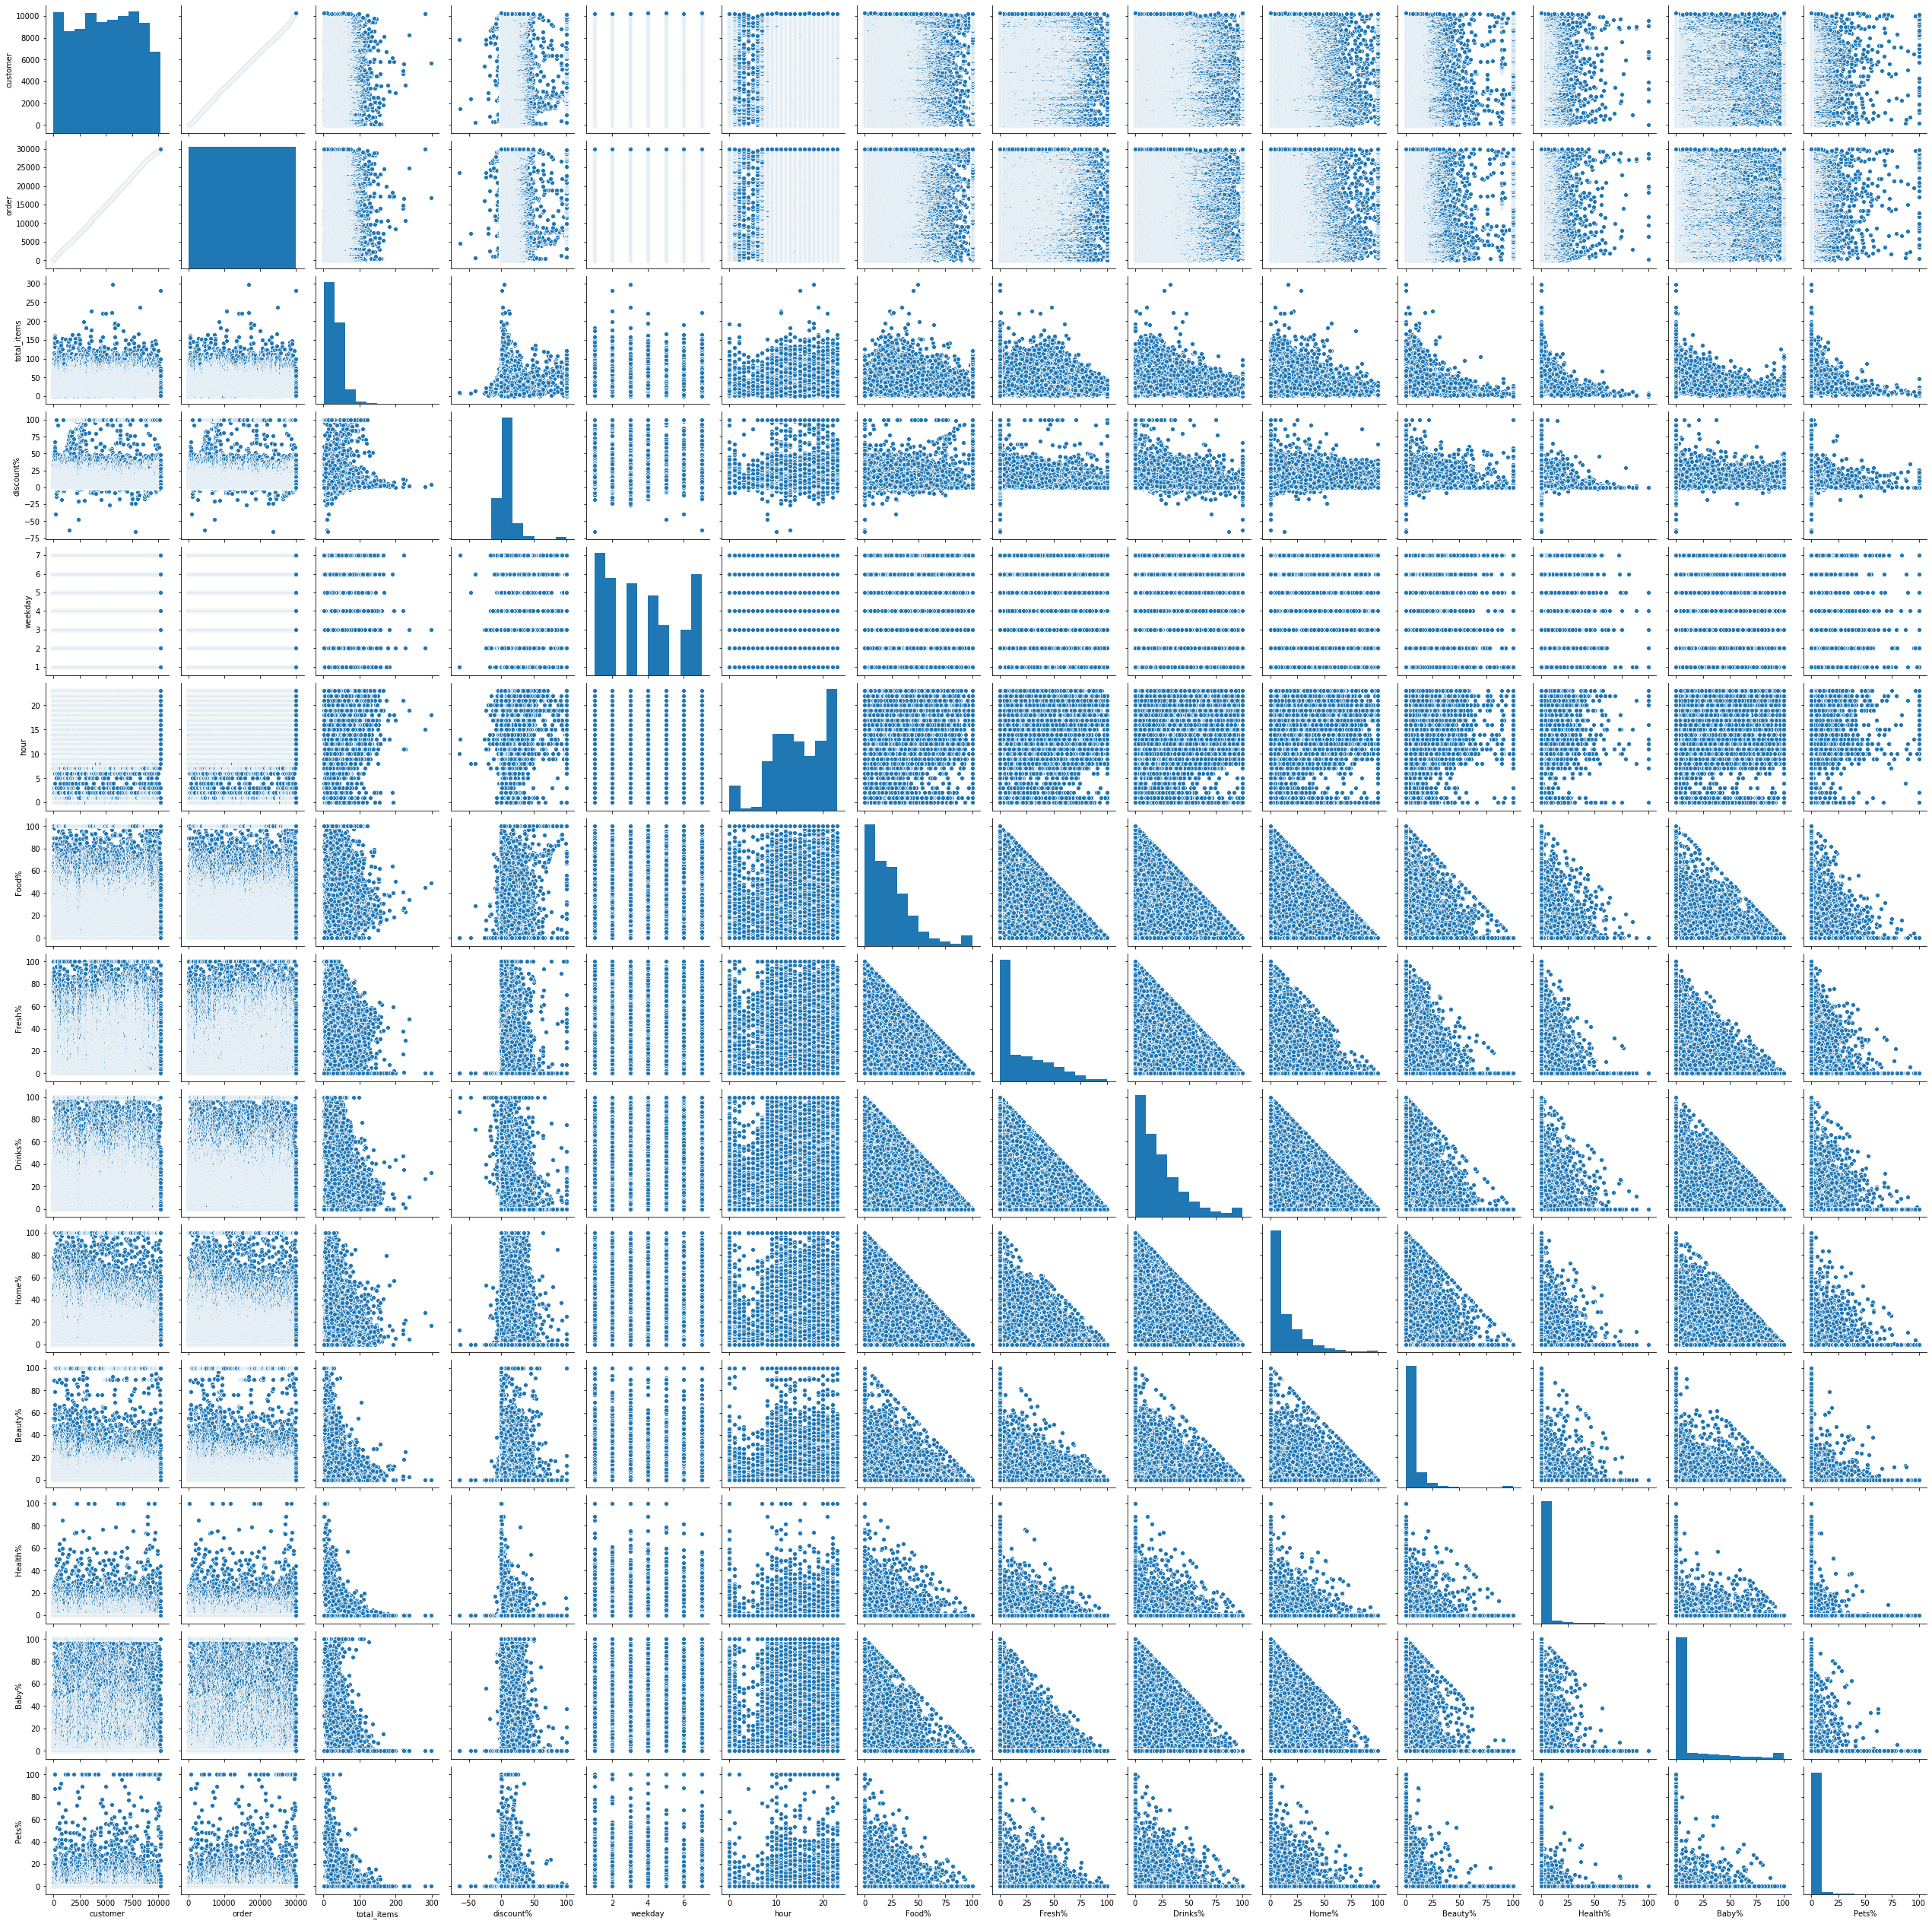

In [91]:
figure=plt.figure(figsize=(20,20))
sns.pairplot(data);
plt.show()

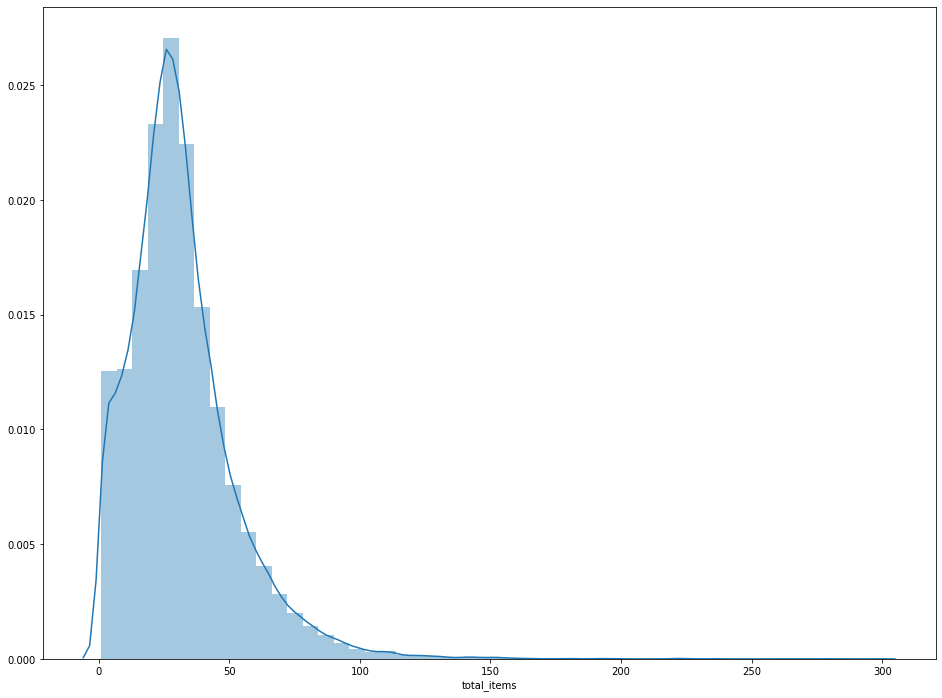

In [92]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

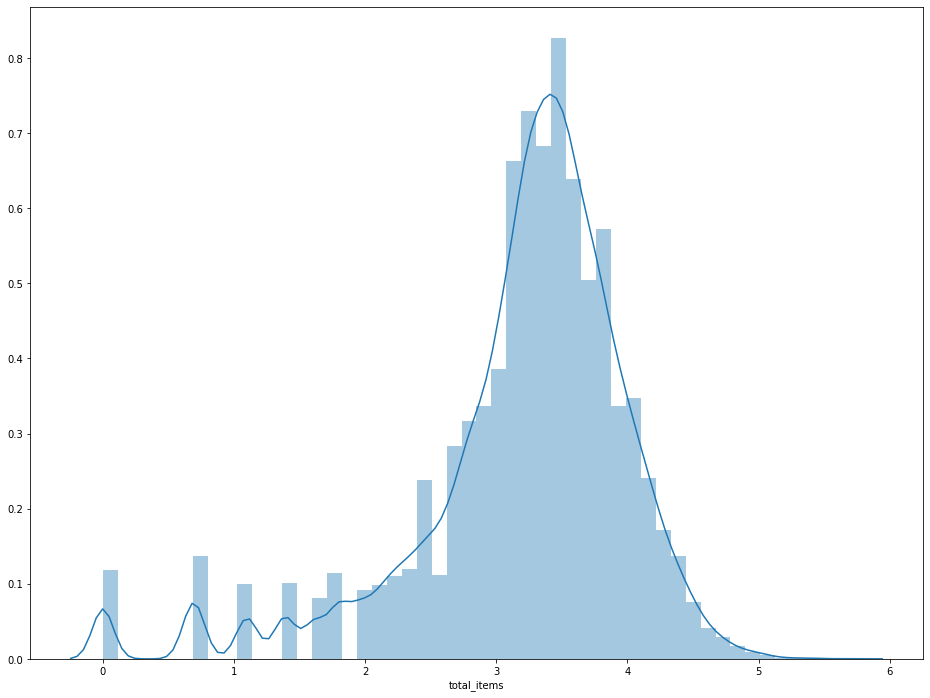

In [93]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

In [0]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [95]:
outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->1899
_________________________
discount%-------->2337
_________________________
weekday-------->0
_________________________
Food%-------->1221
_________________________
Fresh%-------->254
_________________________
Drinks%-------->1386
_________________________
Home%-------->1432
_________________________
Beauty%-------->2901
_________________________
Health%-------->30000
_________________________
Baby%-------->6403
_________________________
Pets%-------->30000


In [0]:
df.drop(outlier_indices['total_items'], inplace=True)

In [0]:
frame.drop(outlier_indices['total_items'], inplace=True)

In [0]:
from sklearn.cluster import KMeans

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
X =scaler.fit_transform(data.values)

In [0]:
X =scaler.fit_transform(data.values)

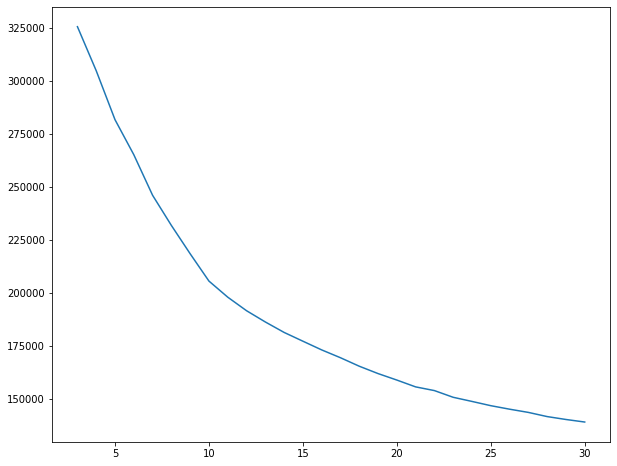

In [102]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

In [0]:
kmeans_10 = KMeans(n_clusters=10, random_state=42)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

In [104]:
frame[frame['labels']==0].head(10)


customer  order  total_items  discount%  ...  Health%  Baby%  Pets%  labels
11          1     11            7      15.00  ...      0.0   0.00    0.0       0
140        18    140           16      21.57  ...      0.0   0.00    0.0       0
220        45    220           20       3.66  ...      0.0   0.00    0.0       0
252        50    252           26       6.60  ...      0.0   0.00    0.0       0
293        58    293           17      13.75  ...      0.0   0.00    0.0       0
362        74    362            6      10.06  ...      0.0   0.00    0.0       0
383        77    383            7       4.16  ...      0.0   0.00    0.0       0
392        81    392           28      17.93  ...      0.0   0.00    0.0       0
432        97    432           19      22.14  ...      0.0   0.00    0.0       0
439       101    439           12       2.18  ...      0.0  43.97    0.0       0

[10 rows x 15 columns]

In [105]:
frame[frame['labels']==0].describe()

customer         order  ...        Pets%  labels
count   2912.000000   2912.000000  ...  2912.000000  2912.0
mean    5035.936126  15058.356799  ...     0.332881     0.0
std     2623.834957   7874.593737  ...     2.144397     0.0
min        1.000000     11.000000  ...     0.000000     0.0
25%     3104.750000   8989.750000  ...     0.000000     0.0
50%     5088.500000  15110.000000  ...     0.000000     0.0
75%     7054.250000  21096.250000  ...     0.000000     0.0
max    10237.000000  29998.000000  ...    23.820000     0.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==0, 'class'] = 'Drink products_cust'


In [107]:
frame[frame['labels']==1].head(10)

customer  order  total_items  discount%  ...  Baby%  Pets%  labels  class
11703      3951  11703            6       0.00  ...   0.00    0.0       1    NaN
12839      4316  12839            9       0.36  ...   0.00    0.0       1    NaN
12859      4323  12859           15       7.72  ...   0.00    0.0       1    NaN
12860      4323  12860           23       4.08  ...   0.00    0.0       1    NaN
12861      4323  12861           16       1.42  ...   0.00    0.0       1    NaN
12862      4323  12862           16       2.29  ...   0.00    0.0       1    NaN
12881      4330  12881           32       0.81  ...   1.97    0.0       1    NaN
12896      4334  12896           10       0.00  ...   0.00    0.0       1    NaN
13028      4405  13028           23       3.77  ...   0.00    0.0       1    NaN
13172      4450  13172           26       3.07  ...   0.00    0.0       1    NaN

[10 rows x 16 columns]

In [143]:
frame[frame['labels']==1].describe()


customer         order  ...        Pets%  labels
count   5575.000000   5575.000000  ...  5575.000000  5575.0
mean    7759.751211  23283.947982  ...     0.615415     1.0
std     1422.792606   4278.075557  ...     2.670633     0.0
min     3951.000000  11703.000000  ...     0.000000     1.0
25%     6666.500000  19944.500000  ...     0.000000     1.0
50%     7885.000000  23838.000000  ...     0.000000     1.0
75%     8913.000000  26930.500000  ...     0.000000     1.0
max    10231.000000  29991.000000  ...    22.800000     1.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==1, 'class'] = 'Grocery products_cust'

In [148]:
frame[frame['labels']==2].head(10)

customer  order  total_items  ...  Pets%  labels                class
5            1      5            8  ...    0.0       2  Fresh products_cust
41           3     41            6  ...    0.0       2  Fresh products_cust
48           4     48           20  ...    0.0       2  Fresh products_cust
105          9    105           13  ...    0.0       2  Fresh products_cust
332         67    332           30  ...    0.0       2  Fresh products_cust
350         70    350           23  ...    0.0       2  Fresh products_cust
369         75    369           10  ...    0.0       2  Fresh products_cust
879        234    879            6  ...    0.0       2  Fresh products_cust
1046       277   1046           30  ...    0.0       2  Fresh products_cust
1174       317   1174           11  ...    0.0       2  Fresh products_cust

[10 rows x 16 columns]

In [149]:
frame[frame['labels']==2].describe()

customer         order  ...        Pets%  labels
count   5371.000000   5371.000000  ...  5371.000000  5371.0
mean    6309.963880  18889.173152  ...     0.504089     2.0
std     2021.049509   6144.024425  ...     2.307573     0.0
min        1.000000      5.000000  ...     0.000000     2.0
25%     4847.500000  14463.500000  ...     0.000000     2.0
50%     6423.000000  19144.000000  ...     0.000000     2.0
75%     7860.000000  23789.500000  ...     0.000000     2.0
max    10228.000000  29981.000000  ...    22.680000     2.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==2, 'class'] = 'Fresh products_cust'

In [151]:
frame[frame['labels']==3].describe()

customer         order  ...        Pets%  labels
count   2606.000000   2606.000000  ...  2606.000000  2606.0
mean    4951.931312  14800.566385  ...     0.238419     3.0
std     2708.566257   8127.457383  ...     1.783733     0.0
min       11.000000    115.000000  ...     0.000000     3.0
25%     2741.000000   7921.500000  ...     0.000000     3.0
50%     4967.000000  14829.500000  ...     0.000000     3.0
75%     7004.000000  20957.250000  ...     0.000000     3.0
max    10230.000000  29986.000000  ...    25.040000     3.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==3, 'class'] = 'Baby products_cust'

In [153]:
frame[frame['labels']==4].describe()

customer         order  total_items  ...       Baby%       Pets%  labels
count    956.000000    956.000000   956.000000  ...  956.000000  956.000000   956.0
mean    4088.412134  12210.814854    25.026151  ...    3.523149    0.395408     4.0
std     2775.337127   8281.739869    13.129414  ...    9.755363    2.374276     0.0
min        9.000000    107.000000     6.000000  ...    0.000000    0.000000     4.0
25%     1659.750000   4974.500000    15.000000  ...    0.000000    0.000000     4.0
50%     3601.500000  10517.000000    24.000000  ...    0.000000    0.000000     4.0
75%     6112.250000  18189.250000    31.000000  ...    0.000000    0.000000     4.0
max    10227.000000  29979.000000   105.000000  ...   61.540000   24.090000     4.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==4, 'class'] = 'Beauty products_cust'

In [155]:
frame[frame['labels']==5].describe()

customer         order  total_items  ...       Baby%       Pets%  labels
count    619.000000    619.000000   619.000000  ...  619.000000  619.000000   619.0
mean    4658.823910  13938.168013    24.466882  ...    5.693813    0.810905     5.0
std     2873.188838   8604.006920    13.202926  ...   14.128055    3.554738     0.0
min        1.000000     18.000000     6.000000  ...    0.000000    0.000000     5.0
25%     2176.000000   6440.500000    16.000000  ...    0.000000    0.000000     5.0
50%     4636.000000  13785.000000    22.000000  ...    0.000000    0.000000     5.0
75%     7032.000000  21033.500000    31.000000  ...    0.000000    0.000000     5.0
max    10227.000000  29978.000000   113.000000  ...   71.000000   36.980000     5.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==5, 'class'] = 'Health products_cust'

In [157]:
frame[frame['labels']==6].describe()

customer         order  total_items  ...       Baby%       Pets%  labels
count    506.000000    506.000000   506.000000  ...  506.000000  506.000000   506.0
mean    3178.177866   9444.088933    46.871542  ...    0.384249    0.141957     6.0
std     2212.175557   6612.606385    24.649007  ...    2.988086    1.731319     0.0
min      100.000000    435.000000     6.000000  ...    0.000000    0.000000     6.0
25%     1645.000000   4908.250000    28.000000  ...    0.000000    0.000000     6.0
50%     2562.500000   7530.500000    46.000000  ...    0.000000    0.000000     6.0
75%     3418.000000   9826.750000    63.000000  ...    0.000000    0.000000     6.0
max    10129.000000  29770.000000   135.000000  ...   37.220000   24.080000     6.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==6, 'class'] = 'Regular products_cust'

In [159]:
frame[frame['labels']==7].describe()

customer         order  ...        Pets%  labels
count   2587.000000   2587.000000  ...  2587.000000  2587.0
mean    3983.299575  11891.669115  ...     0.395945     7.0
std     2540.618414   7585.606749  ...     2.331037     0.0
min        4.000000     69.000000  ...     0.000000     7.0
25%     1925.000000   5704.000000  ...     0.000000     7.0
50%     3763.000000  11137.000000  ...     0.000000     7.0
75%     5682.500000  16891.500000  ...     0.000000     7.0
max    10201.000000  29931.000000  ...    22.140000     7.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==7, 'class'] = 'Home products_cust'

In [161]:
frame[frame['labels']==8].describe()

customer         order  total_items  ...       Baby%       Pets%  labels
count    365.000000    365.000000   365.000000  ...  365.000000  365.000000   365.0
mean    5006.893151  14942.912329    24.575342  ...    2.614438   41.928219     8.0
std     2743.232813   8206.837272    14.842875  ...    8.782189   21.276483     0.0
min      109.000000    461.000000     6.000000  ...    0.000000   20.380000     8.0
25%     2885.000000   8297.000000    15.000000  ...    0.000000   26.890000     8.0
50%     5111.000000  15183.000000    21.000000  ...    0.000000   34.390000     8.0
75%     7185.000000  21537.000000    30.000000  ...    0.000000   48.550000     8.0
max    10198.000000  29906.000000    98.000000  ...   71.670000  100.000000     8.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==8, 'class'] = 'pet products_cust'

In [163]:
frame[frame['labels']==9].describe()

customer         order  total_items  ...        Baby%        Pets%  labels
count  6604.000000   6604.000000  6604.000000  ...  6604.000000  6604.000000  6604.0
mean   2123.365233   6336.798455    41.528316  ...     4.219426     0.591813     9.0
std    1441.874336   4169.060793    20.286065  ...     9.311854     2.578000     0.0
min       0.000000      0.000000     6.000000  ...     0.000000     0.000000     9.0
25%     825.000000   2663.750000    28.000000  ...     0.000000     0.000000     9.0
50%    1993.500000   5911.000000    37.000000  ...     0.000000     0.000000     9.0
75%    3424.000000   9854.250000    51.000000  ...     1.312500     0.000000     9.0
max    5741.000000  17075.000000   139.000000  ...    50.650000    23.860000     9.0

[8 rows x 15 columns]

In [0]:
frame.loc[frame['labels']==9, 'class'] = 'Varied products_cust'

In [165]:
frame.groupby('class')['total_items'].describe()

count       mean        std  ...   50%   75%    max
class                                                ...                   
Baby products_cust     2606.0  18.868764  11.395071  ...  16.0  24.0  126.0
Beauty products_cust    956.0  25.026151  13.129414  ...  24.0  31.0  105.0
Drink products_cust    2912.0  23.092376  11.373279  ...  22.0  30.0   98.0
Fresh products_cust    5371.0  37.850493  18.216191  ...  34.0  47.0  139.0
Grocery products_cust  5575.0  36.818296  18.213033  ...  33.0  45.0  140.0
Health products_cust    619.0  24.466882  13.202926  ...  22.0  31.0  113.0
Home products_cust     2587.0  25.781600  12.601937  ...  24.0  32.0  121.0
Regular products_cust   506.0  46.871542  24.649007  ...  46.0  63.0  135.0
Varied products_cust   6604.0  41.528316  20.286065  ...  37.0  51.0  139.0
pet products_cust       365.0  24.575342  14.842875  ...  21.0  30.0   98.0

[10 rows x 8 columns]

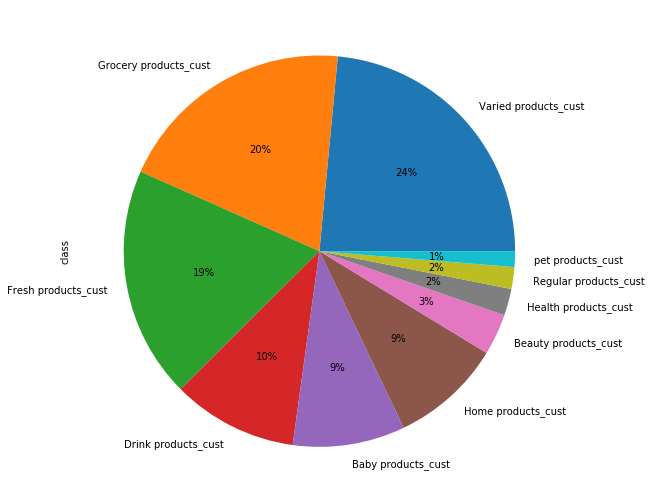

In [166]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()